In [48]:
%matplotlib inline

In [49]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation, preprocessing

from assistments_workbench.models.models import classification_model
from assistments_workbench.config_reader import config

In [50]:
pylab.rcParams['figure.figsize'] = 9, 6
pylab.rcParams['font.size'] = 14

In [51]:
k = 5

In [52]:
input_data = pd.read_csv(os.path.join(config.get('localfiles', 'data_path'), 'arrs_data_pfa.csv'))
input_data = input_data.drop_duplicates(['skill_id', 'user_id', 'difficulty'], keep='first')

In [53]:
input_data.describe()

,correct,skill_id,user_id,difficulty,104_corr,119_corr,120_corr,130_corr,136_corr,149_corr,...,292_incorr,296_incorr,46_incorr,49_incorr,51_incorr,52_incorr,77_incorr,88_incorr,89_incorr,90_incorr
count,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,...,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000
mean,0.697140,202.180623,287291.122322,0.711606,0.005805,0.032693,0.027828,0.061716,0.008109,0.168758,...,0.008707,0.000683,0.001878,0.003500,0.007426,0.005719,0.007256,0.021169,0.014426,0.015621
std,0.459515,58.533978,57591.777173,0.147327,0.177630,0.349697,0.308511,0.562803,0.162213,0.841826,...,0.127730,0.026124,0.086654,0.093705,0.153596,0.181672,0.180201,0.242833,0.172994,0.183431
min,0.000000,46.000000,45309.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,196.000000,278744.000000,0.616054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,217.000000,286097.000000,0.743860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,239.000000,345500.000000,0.815077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,296.000000,385097.000000,1.000000,11.000000,8.000000,7.000000,14.000000,5.000000,14.000000,...,4.000000,1.000000,7.000000,5.000000,7.000000,11.000000,8.000000,10.000000,5.000000,7.000000


In [54]:
input_data.head()

,correct,skill_id,user_id,difficulty,104_corr,119_corr,120_corr,130_corr,136_corr,149_corr,...,292_incorr,296_incorr,46_incorr,49_incorr,51_incorr,52_incorr,77_incorr,88_incorr,89_incorr,90_incorr
0,1,239,223605,0.861940,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,239,221805,0.812105,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,239,221878,0.885741,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,239,221665,0.796260,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,239,221797,0.834661,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# mean of probelm difficulty
np.mean(input_data['difficulty'])

0.7116058022774806

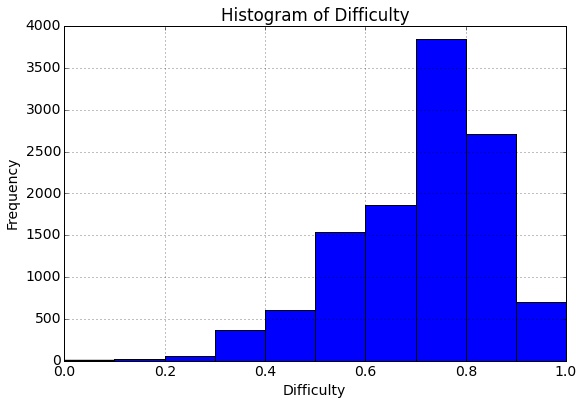

In [56]:
# hisogtam of difficulty
input_data['difficulty'].hist()
plt.title('Histogram of Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')

In [57]:
# input_data['opp_count'] = input_data['pre_corr'] + input_data['pre_incorr']

In [58]:
# pd.crosstab(input_data['opp_count'][:100], input_data['correct'][:100].astype(bool)).plot(kind='bar')
# plt.title('Num of pervious opportunities by by correctness')
# plt.xlabel('Num of pervious opportunity ')
# plt.ylabel('Frequency')

In [59]:
all_features = input_data.columns.tolist()
print all_features

['correct', 'skill_id', 'user_id', 'difficulty', '104_corr', '119_corr', '120_corr', '130_corr', '136_corr', '149_corr', '156_corr', '158_corr', '178_corr', '196_corr', '198_corr', '212_corr', '213_corr', '217_corr', '219_corr', '239_corr', '259_corr', '262_corr', '263_corr', '265_corr', '278_corr', '291_corr', '292_corr', '296_corr', '46_corr', '49_corr', '51_corr', '52_corr', '77_corr', '88_corr', '89_corr', '90_corr', '104_incorr', '119_incorr', '120_incorr', '130_incorr', '136_incorr', '149_incorr', '156_incorr', '158_incorr', '178_incorr', '196_incorr', '198_incorr', '212_incorr', '213_incorr', '217_incorr', '219_incorr', '239_incorr', '259_incorr', '262_incorr', '263_incorr', '265_incorr', '278_incorr', '291_incorr', '292_incorr', '296_incorr', '46_incorr', '49_incorr', '51_incorr', '52_incorr', '77_incorr', '88_incorr', '89_incorr', '90_incorr']


In [60]:
label = 'correct'
all_features.remove(label)
all_features.remove('user_id')
predictors = all_features
categorical_features = ['skill_id']
cv_label_name = 'user_id'

In [61]:
model = LogisticRegression()
classification_model(model = model, data = input_data, predictors = predictors, label = label, 
                     categorical_features = categorical_features, cv_label_name = cv_label_name, p = None, k = k, train_only = False)

(0.72731926473437991,
 0.13769596389134051,
 0.42688729712774143,
 0.72701664532650445)